In [3]:
import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import Normalize
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import sys
import os

## Patient 1

In [4]:
datafile = "/content/Heart1_SimuData_4000_200Cropped_LV_Only.csv"
data = pd.read_csv(datafile, header=None)
labels = pd.read_csv("/content/sim_sub1_labels.csv", header=None)

In [5]:
labels.shape

(2000, 1)

In [6]:
data.shape

(2000, 2400)

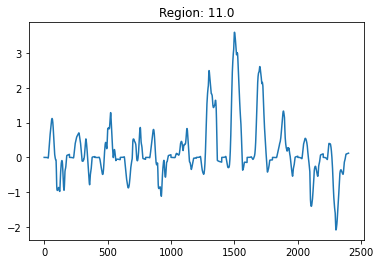

In [7]:
plt.plot(data.iloc[0,:])
plt.title(f"Region: {labels.iloc[0, 0]}")
plt.savefig("ECG_Data_Patient_1.png")
plt.show()

Text(0.5, 1.0, '4.0')

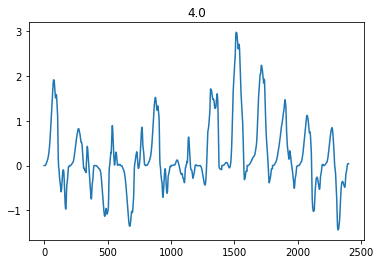

In [8]:
plt.plot(data.iloc[13,:])
plt.title(labels.iloc[13,0])

In [9]:
scaler = StandardScaler().fit(data)

In [10]:
scaled_data = scaler.transform(data)

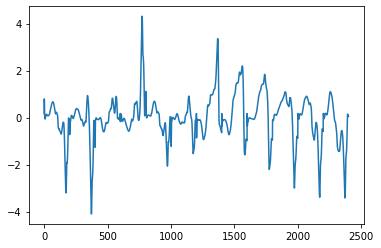

In [11]:
plt.plot(scaled_data[13])

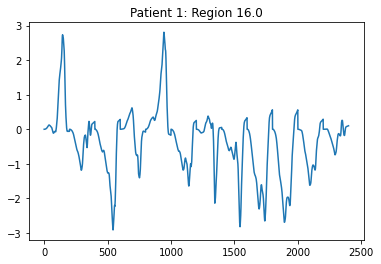

In [12]:
plt.plot(data.iloc[24,:])
plt.title(f"Patient 1: Region {labels.iloc[24, 0]}")
plt.savefig("ECG_Data_Patient_1.png")
plt.show()

In [13]:
counts = labels.value_counts()
counts = counts.sort_index()
x_axis = [int(x[0]) + 1 for x in list(counts.keys())]
y_axis = list(counts.values)

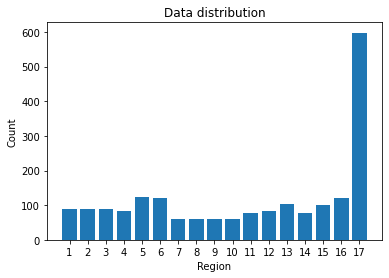

In [14]:
plt.bar(x_axis, y_axis, tick_label=x_axis)
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Data distribution")
plt.savefig("Data_Dis_1.png")
plt.show()

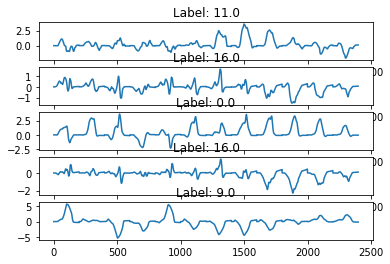

In [15]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5)
store = {
    0: ax1,
    1: ax2,
    2: ax3,
    3: ax4,
    4: ax5
}
for i in range(5):
    store[i].plot(data.iloc[i, :])
    label = f"Label: {labels.iloc[i, 0]}"
    store[i].set_title(label)


In [16]:
data_t = torch.tensor(data.values)

In [17]:
data_t = data_t.unsqueeze(2)

In [18]:
data_t.shape

torch.Size([2000, 2400, 1])

## Patient 2

In [19]:
datafile2 = "/content/Heart2_SimuData_4000_175Cropped_LV_Only.csv"
label2 = "/content/sim_sub3_labels.csv"
data2 = pd.read_csv(datafile2, header=None)
labels2 = pd.read_csv(label2, header=None)

In [20]:
data2.shape

(2000, 2100)

In [21]:
labels2.shape

(2000, 1)

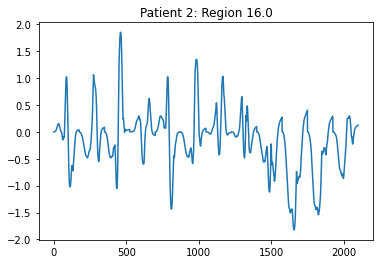

In [22]:
plt.plot(data2.iloc[24,:])
plt.title(f"Patient 2: Region {labels.iloc[24, 0]}")
plt.savefig("ECG_Data_Patient_2.png")
plt.show()

In [23]:
counts2 = labels2.value_counts()
counts2 = counts.sort_index()
x_axis_2 = [int(x[0]) + 1 for x in list(counts2.keys())]
y_axis_2 = list(counts2.values)

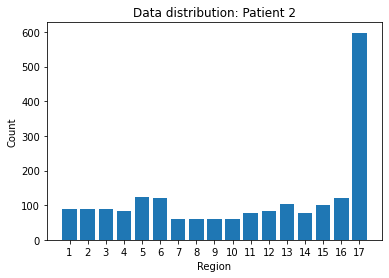

In [24]:
plt.bar(x_axis_2, y_axis_2, tick_label=x_axis_2)
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Data distribution: Patient 2")
plt.savefig("Data_Dis_2.png")
plt.show()

In [25]:
counts

0.0      90
1.0      89
2.0      90
3.0      83
4.0     125
5.0     122
6.0      60
7.0      61
8.0      60
9.0      60
10.0     78
11.0     82
12.0    102
13.0     78
14.0    101
15.0    121
16.0    598
dtype: int64

In [26]:
counts2

0.0      90
1.0      89
2.0      90
3.0      83
4.0     125
5.0     122
6.0      60
7.0      61
8.0      60
9.0      60
10.0     78
11.0     82
12.0    102
13.0     78
14.0    101
15.0    121
16.0    598
dtype: int64

In [27]:
data3 = pd.concat([data, data2])

In [28]:
data3

,0,1,2,3,4,5,6,7,8,9,...,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399
0,2.349000e-14,0.000010,0.000025,0.000044,0.000070,0.000062,0.000042,0.000023,0.000099,0.000149,...,0.108129,0.109446,0.110781,0.112135,0.113506,0.114896,0.116305,0.117733,0.119181,0.120649
1,2.349000e-14,0.000011,0.000027,0.000047,0.000246,0.000443,0.000824,0.001184,0.001747,0.002946,...,0.059703,0.060651,0.061611,0.062583,0.063567,0.064563,0.065572,0.066592,0.067623,0.068666
2,2.349000e-14,-0.000017,-0.000041,-0.000071,-0.000091,-0.000116,-0.000089,-0.000114,0.000293,0.000868,...,-0.050636,-0.050843,-0.051050,-0.051260,-0.051470,-0.051682,-0.051895,-0.052110,-0.052326,-0.052544
3,2.349000e-14,-0.000029,-0.000071,-0.000122,-0.000168,-0.000255,-0.000433,-0.000791,-0.001416,-0.002191,...,0.084157,0.085576,0.087026,0.088507,0.090022,0.091570,0.093154,0.094776,0.096435,0.098134
4,2.349000e-14,0.000008,0.000020,0.000035,0.000069,0.000245,0.000314,0.000354,0.000536,0.001436,...,-0.144366,-0.145652,-0.146958,-0.148286,-0.149636,-0.151009,-0.152406,-0.153827,-0.155274,-0.156747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3.805000e-14,-0.000011,-0.000027,-0.000047,-0.000053,0.000067,0.000036,0.000057,-0.001908,-0.008254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,3.805000e-14,-0.000186,-0.000672,-0.005421,-0.015297,-0.029900,-0.046287,-0.065249,-0.089301,-0.113086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,3.805000e-14,0.000175,0.000424,0.000594,-0.001719,-0.006544,-0.012978,-0.021254,-0.030145,-0.038619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,3.805000e-14,-0.000025,-0.000070,-0.000858,-0.005329,-0.016937,-0.036378,-0.060302,-0.085967,-0.112959,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
datafile3 = "/content/Heart3_SimuData_4000_220Cropped_LV_Only.csv"
dataset3 = pd.read_csv(datafile2, header=None)
label3 = "/content/sim_sub3_labels.csv"
labels3 = pd.read_csv(label3, header=None)

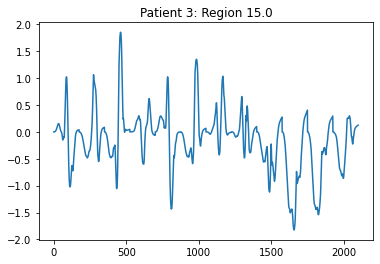

In [30]:
plt.plot(dataset3.iloc[24,:])
plt.title(f"Patient 3: Region {labels.iloc[23, 0]}")
plt.savefig("ECG_Data_Patient_3.png")
plt.show()

In [31]:
dataset3.shape

(2000, 2100)

In [32]:
y = torch.randint(low=0, high=16, size=(64,1))

In [33]:
x = torch.rand(64,17)

In [34]:
data = torch.Tensor([[-0.0715, -0.0313,  0.0478,   0.0252, -0.0271, -0.0501],
        [-0.0828, -0.0335,  0.0584,  0.0271, -0.0316, -0.0600],
        [-0.0779, -0.0255,  0.0479,   0.0360, -0.0390, -0.0569],
        [-0.0844, -0.0243,  0.0492,  0.0235, -0.0352, -0.0653],
        [-0.0844, -0.0247,  0.0495,   0.0200, -0.0240, -0.0656],
        [-0.0824, -0.0232,  0.0471,  0.0201, -0.0182, -0.0655]])

In [35]:
_, tags = torch.max(data, dim=1)

In [36]:
_, tags = torch.max(x, dim=1)

In [37]:
tags.shape

torch.Size([64])

In [38]:
y = y.reshape(64)

In [39]:
(tags == y).sum()

tensor(5)

In [40]:
l = torch.nn.Conv1d(1,2,3,stride=2)

In [41]:
r = torch.rand(64,1,2640)

In [42]:
l(r).shape

torch.Size([64, 2, 1319])

In [43]:
l2 = torch.nn.Conv1d(2,4,3,2)

In [44]:
l2(l(r)).shape

torch.Size([64, 4, 659])